<a href="https://colab.research.google.com/github/kkashish-10/Deep_Learning/blob/main/Vanilla_ViT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!git clone https://github.com/kkashish-10/NLP-Natural-Language-Processing.git

Cloning into 'NLP-Natural-Language-Processing'...
remote: Enumerating objects: 70, done.
remote: Total 70 (delta 0), reused 0 (delta 0), pack-reused 70
Unpacking objects: 100% (70/70), 135.04 MiB | 7.30 MiB/s, done.
Updating files: 100% (14/14), done.


In [ ]:
! git init


Initialized empty Git repository in /content/.git/


In [3]:
!git  commit -m 'Initial commit'


*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@54be8afe8b98.(none)')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
cd /content/sample_data

/content/sample_data


In [ ]:
! kaggle datasets download -d tourist55/alzheimers-dataset-4-class-of-images

 62% 21.0M/34.1M [00:00<00:00, 114MB/s] 
100% 34.1M/34.1M [00:00<00:00, 143MB/s]


In [ ]:
! unzip /content/sample_data/alzheimers-dataset-4-class-of-images.zip

Streaming output truncated to the last 5000 lines.
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem207.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem208.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem209.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem21.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem210.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem211.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem212.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem213.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem214.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem215.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem216.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem217.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem218.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/m

In [ ]:
import numpy as np
import pandas as pd 
import os

import copy
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import cv2
import keras
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import load_img, img_to_array
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.applications.vgg16 import VGG16,preprocess_input

In [ ]:
W = 32 # The default size for ResNet is 224 but resize to .5 to save memory size
H = 32 # The default size for ResNet is 224 but resize to .5 to save memory size

label_to_class = {
    'MildDemented': 0,
    'ModerateDemented': 1,
    'NonDemented': 2,
    'VeryMildDemented':3
    

}
class_to_label = {v: k for k, v in label_to_class.items()}
n_classes = len(label_to_class)

def get_images(dir_name='../content/sample_data/Alzheimer_s Dataset/', label_to_class=label_to_class):
    """read images / labels from directory"""
    
    Images = []
    Classes = []
    
    for j in ['/train','/test']:
        for label_name in os.listdir(dir_name+str(j)):
            cls = label_to_class[label_name]

            for img_name in os.listdir('/'.join([dir_name+str(j), label_name])):
                img = load_img('/'.join([dir_name+str(j), label_name, img_name]), target_size=(W, H))
                img = img_to_array(img)

                Images.append(img)
                Classes.append(cls)
            
    Images = np.array(Images, dtype=np.float32)
    Classes = np.array(Classes, dtype=np.float32)
    Images, Classes = shuffle(Images, Classes, random_state=0)
    
    return Images, Classes

In [ ]:
cd /content

/content


In [ ]:
## get images / labels

Images, Classes = get_images()

Images.shape, Classes.shape

((6400, 32, 32, 3), (6400,))

In [ ]:
## split train / test

indices_train, indices_test = train_test_split(list(range(Images.shape[0])), train_size=0.8, test_size=0.2, shuffle=True)

x_train = Images[indices_train]
y_train = Classes[indices_train]
x_test = Images[indices_test]
y_test = Classes[indices_test]

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((5120, 32, 32, 3), (5120,), (1280, 32, 32, 3), (1280,))

In [ ]:
y_train = keras.utils.np_utils.to_categorical(y_train, n_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, n_classes)

y_train.shape, y_test.shape

((5120, 4), (1280, 4))

In [ ]:
pip install -U tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 4.7 MB/s 


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa

In [ ]:
num_classes = 4
input_shape = (32, 32, 3)

In [ ]:
learning_rate = 0.001
weight_decay = 0.0001
batch_size = 64
num_epochs = 50
image_size = 128  # We'll resize input images to this size
patch_size = 12  # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 8
mlp_head_units = [2048, 1024] 

In [ ]:
#data augmentation
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(image_size, image_size),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(height_factor=0.2, width_factor=0.2),
    ],
    name="data_augmentation",
)
# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(x_train)

In [ ]:
#Implement multilayer perceptron (MLP)

def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

In [ ]:
#Implement patch creation as a layer
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

Image size: 128 X 128
Patch size: 12 X 12
Patches per image: 100
Elements per patch: 432


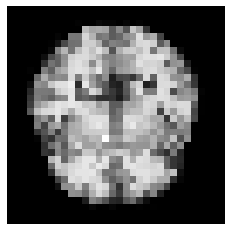

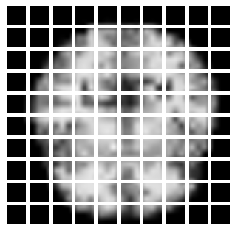

In [ ]:
#display a patch
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
image = x_train[np.random.choice(range(x_train.shape[0]))]
plt.imshow(image.astype("uint8"))
plt.axis("off")

resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size=(image_size, image_size)
)
patches = Patches(patch_size)(resized_image)
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(patch_img.numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
 # the patch encoding layer
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

In [ ]:
def create_vit_classifier():
    inputs = layers.Input(shape=input_shape)
    # Augment data.
    augmented = data_augmentation(inputs)
    # Create patches.
    patches = Patches(patch_size)(augmented)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    # Classify outputs.
    logits = layers.Dense(num_classes)(features)
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    return model

In [ ]:
def run_experiment(model):
    optimizer = tfa.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.CategoricalCrossentropy(from_logits=True),
        metrics=[
            keras.metrics.CategoricalAccuracy(name="accuracy"),
            keras.metrics.TopKCategoricalAccuracy(5, name="top-5-accuracy"),
        ],
    )

    checkpoint_filepath = "/tmp/checkpoint"
    checkpoint_callback = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )

    history = model.fit(
        x=x_train,
        y=y_train,
        batch_size=batch_size,
        epochs=num_epochs,
        validation_split=0.1,
        callbacks=[checkpoint_callback] )

    model.load_weights(checkpoint_filepath)
    _, accuracy, top_5_accuracy = model.evaluate(x_test, y_test)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")

    return history


vit_classifier = create_vit_classifier()
history = run_experiment(vit_classifier)

Epoch 1/50
72/72 [==============================] - 221s 3s/step - loss: 2.3265 - accuracy: 0.4288 - top-5-accuracy: 1.0000 - val_loss: 1.1033 - val_accuracy: 0.3984 - val_top-5-accuracy: 1.0000
Epoch 2/50
72/72 [==============================] - 205s 3s/step - loss: 1.1007 - accuracy: 0.4718 - top-5-accuracy: 1.0000 - val_loss: 1.0395 - val_accuracy: 0.4707 - val_top-5-accuracy: 1.0000
Epoch 3/50
72/72 [==============================] - 207s 3s/step - loss: 1.0341 - accuracy: 0.5026 - top-5-accuracy: 1.0000 - val_loss: 0.9776 - val_accuracy: 0.5059 - val_top-5-accuracy: 1.0000
Epoch 4/50
72/72 [==============================] - 205s 3s/step - loss: 1.0051 - accuracy: 0.5078 - top-5-accuracy: 1.0000 - val_loss: 0.9606 - val_accuracy: 0.5449 - val_top-5-accuracy: 1.0000
Epoch 5/50
72/72 [==============================] - 209s 3s/step - loss: 1.0137 - accuracy: 0.5087 - top-5-accuracy: 1.0000 - val_loss: 0.9725 - val_accuracy: 0.5410 - val_top-5-accuracy: 1.0000
Epoch 6/50
72/72 [=======

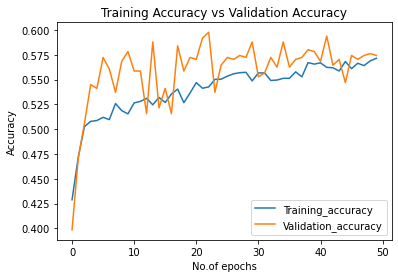

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label='Training_accuracy')
plt.plot(history.history['val_accuracy'],label='Validation_accuracy')
plt.legend()
plt.title('Training Accuracy vs Validation Accuracy')
plt.xlabel('No.of epochs')
plt.ylabel('Accuracy')
plt.show()
plt.savefig('Loss_Graph')

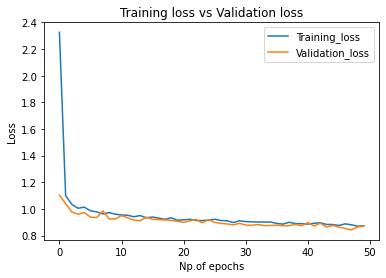

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='Training_loss')
plt.plot(history.history['val_loss'],label='Validation_loss')
plt.legend()
plt.title('Training loss vs Validation loss')
plt.xlabel('Np.of epochs')
plt.ylabel('Loss')
plt.show()
plt.savefig('Loss_Graph')

In [ ]:
y_pred=vit_classifier.predict(x_test)
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)

40/40 [==============================] - 20s 475ms/step


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [ ]:
cm=confusion_matrix(y_pred,y_test)

In [ ]:
print(cm)

[[ 36   1  18  22]
 [  0   0   0   0]
 [ 10   1 403 146]
 [127   6 219 291]]


In [ ]:
target_names=['Mild Demented (0)','Moderate Demented (1)','Non Demented (2)','Very Mild Demented (3)']

In [ ]:
print(classification_report(y_test,y_pred,target_names=target_names,digits=2))

                        precision    recall  f1-score   support

     Mild Demented (0)       0.47      0.21      0.29       173
 Moderate Demented (1)       0.00      0.00      0.00         8
      Non Demented (2)       0.72      0.63      0.67       640
Very Mild Demented (3)       0.45      0.63      0.53       459

              accuracy                           0.57      1280
             macro avg       0.41      0.37      0.37      1280
          weighted avg       0.59      0.57      0.56      1280



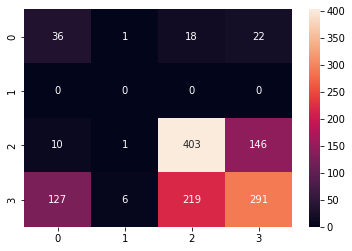

In [ ]:
f = sns.heatmap(cm, annot=True, fmt='d')  #confusion matrix plot

In [ ]:
plt.figure(figsize=(20,30))

<Figure size 1440x2160 with 0 Axes>

<Figure size 1440x2160 with 0 Axes>

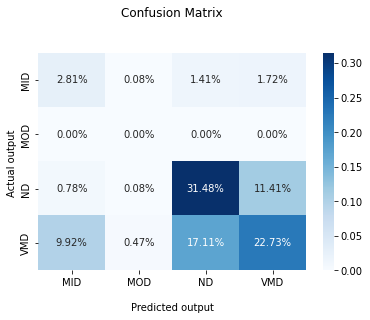

In [ ]:
ax = sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted output')
ax.set_ylabel('Actual output ');


ax.xaxis.set_ticklabels(['MID','MOD', 'ND','VMD'])
ax.yaxis.set_ticklabels(['MID','MOD', 'ND','VMD'])
plt.show()

In [ ]:
classes = ["MID", "MOD","ND","VMD"]

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
clf_report = classification_report(y_test,
                                   y_pred,
                                   target_names=classes,
                                   output_dict=True)

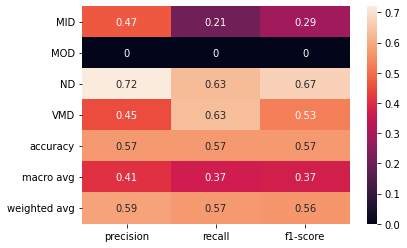

In [ ]:
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)  

In [ ]:
from sklearn import metrics

In [ ]:
def print_performance_metrics(y_test, y_pred):
    """
        parameters
        ----------
        y_test : actual label (must be in non-one hot encoded form)
        y_pred_test : predicted labels (must be in non-one hot encoded form, common output of predict methods of classifers)

        returns
        -------
        prints the accuracy, precision, recall, F1 score, ROC AUC score, Cohen Kappa Score, Matthews Corrcoef and classification report   
    
    """
    print('Accuracy:', np.round(metrics.accuracy_score(y_test, y_pred),4))
    print('Precision:', np.round(metrics.precision_score(y_test, y_pred, average='weighted'),4))
    print('Recall:', np.round(metrics.recall_score(y_test, y_pred, average='weighted'),4))
    print('F1 Score:', np.round(metrics.f1_score(y_test, y_pred, average='weighted'),4))
    #print('ROC AUC Score:', np.round(metrics.roc_auc_score(y_test,  max_y_pred_test,multi_class='ovo', average='weighted'),4))
    print('\t\tClassification Report:\n', metrics.classification_report(y_test, y_pred))

In [ ]:
print('------------------------ test set ------------------------')
print_performance_metrics(y_test,y_pred)

------------------------ test set ------------------------
Accuracy: 0.5703
Precision: 0.5853
Recall: 0.5703
F1 Score: 0.5641
		Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.21      0.29       173
           1       0.00      0.00      0.00         8
           2       0.72      0.63      0.67       640
           3       0.45      0.63      0.53       459

    accuracy                           0.57      1280
   macro avg       0.41      0.37      0.37      1280
weighted avg       0.59      0.57      0.56      1280

